In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dask.array as da
import zarr as zr
import django
from dask.distributed import Client, progress

django.setup()
from elements.models import Zarr
from dask.distributed import Client, progress
c = Client()
import xarray, h5py

Debugging build


In [2]:
filepath = "/code/media/test.h5"
array = None
with h5py.File(filepath) as f:
    for key in f["representation"]:
        array = f["representation/"+key][()]
        break

In [3]:
nparray = array
physicalX = 0.65
physicalY = 0.65
physicalZ = 0.65


lala = xarray.DataArray(nparray,dims=('x', 'y', 'channels', "z", "time"), coords={'channels': ["R","G","B"]})
lala = xarray.DataArray(nparray,dims=('x', 'y', 'channels', "z", "time"), coords={ "x" :  (lala.x * physicalX),'y': (lala.y * physicalY), "z": (lala.z * physicalZ), "time": [0], 'channels': ["R","G","B"]})
lala.attrs['units'] = 'µm'

In [4]:
zarrins = Zarr.objects.create(store="/code/media/zarr/sample-3", group="representation/intialstack")
zarrins

<Zarr: Zarr object (27)>

In [6]:
zarrins.saveArray(lala)

In [7]:
array = zarrins.openArray()

In [8]:
array

<xarray.DataArray 'data' (x: 1024, y: 1024, channels: 3, z: 21, time: 1)>
dask.array<zarr, shape=(1024, 1024, 3, 21, 1), dtype=float16, chunksize=(256, 256, 1, 11, 1), chunktype=numpy.ndarray>
Coordinates:
  * channels  (channels) <U1 'R' 'G' 'B'
  * time      (time) int64 0
  * x         (x) float64 0.0 0.65 1.3 1.95 2.6 ... 663.0 663.6 664.3 665.0
  * y         (y) float64 0.0 0.65 1.3 1.95 2.6 ... 663.0 663.6 664.3 665.0
  * z         (z) float64 0.0 0.65 1.3 1.95 2.6 ... 10.4 11.05 11.7 12.35 13.0
Attributes:
    units:    µm

In [9]:
it = array.sel(channels=["R","G"]).mean(axis=3)

In [11]:

zarrout = Zarr.objects.create(store="/code/media/zarr/sample-3", group="representation/maxisprg")
stored = zarrout.saveArray(it, compute=False)

In [12]:
stored.compute()

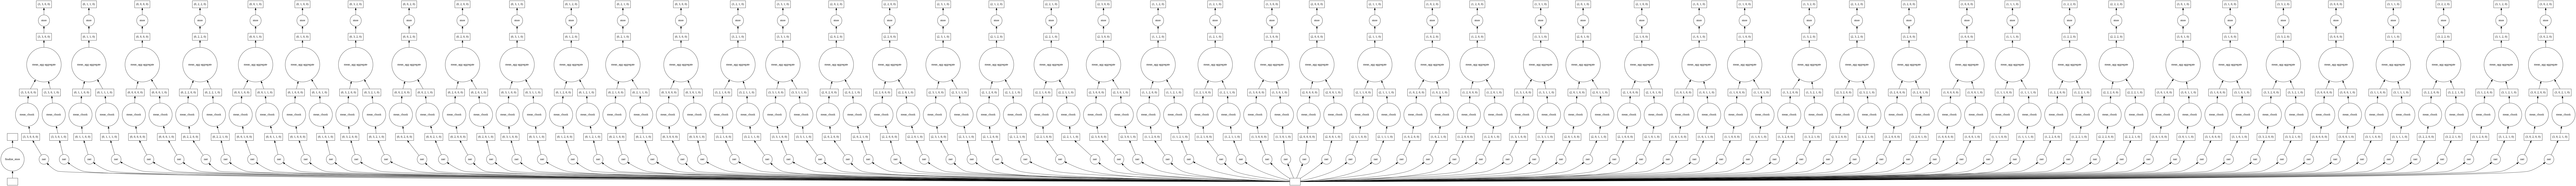

In [23]:
stored.visualize()

In [14]:
zarrout.loadDataset()

<xarray.Dataset>
Dimensions:   (channels: 2, time: 1, x: 1024, y: 1024)
Coordinates:
  * channels  (channels) <U1 'R' 'G'
  * time      (time) int64 0
  * x         (x) float64 0.0 0.65 1.3 1.95 2.6 ... 663.0 663.6 664.3 665.0
  * y         (y) float64 0.0 0.65 1.3 1.95 2.6 ... 663.0 663.6 664.3 665.0
Data variables:
    data      (x, y, channels, time) float16 dask.array<chunksize=(256, 256, 1, 1), meta=np.ndarray>